We are going to use the Karhunen-Loéve expansion to simulate some approximate Brownian motion curves.

In [7]:
# get some modules installed to start with
import numpy as np
from scipy.stats import binom
#from pylab import *
#%matplotlib inline
#%matplotlib notebook
#%pylab notebook
%pylab inline
#style.use('seaborn-white')
import seaborn as sns
from IPython.display import HTML
from matplotlib import animation, rc

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


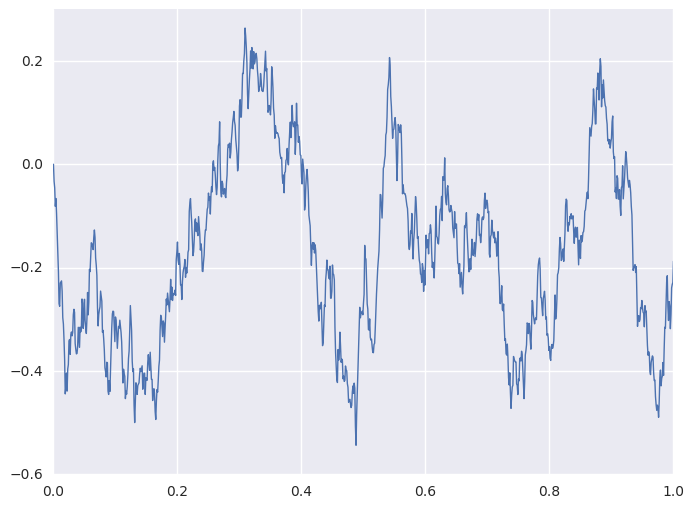

In [8]:
# set the number of terms in the simulation
N = 1000
# define the time variable
T = 1
t = np.linspace(0,T,2001)
# generate the basis functions
phi = lambda n,t: (2*np.sqrt(2*T)/((2*n+1)*pi))*sin((n+0.5)*pi*t/T)
# generate the plot data
fig = figure(figsize=(8,6));
ax = subplot(111);
t = np.linspace(0, T, 1001)
y = np.zeros((np.size(t),N+1))
for n in range(N):
    y[:,n+1] = y[:,n]+np.random.randn()*phi(n,t)
line, = ax.plot(t, y[:,N], lw=1)
savefig('Images/KL%d.eps'%N)
savefig('Images/KL%d.pdf'%N)


#savefig('Images/KL%d.eps'%N)
#savefig('Images/KL%d.pdf'%N)

In [9]:
# make a movie
def init():
    line.set_data([], [])
    return (line,)
def update(n):
    line.set_data(t, y[:,n+1])
    return (line,)
anim = animation.FuncAnimation(fig, update, init_func=init,
                               frames=N, interval=20, blit=True, repeat=False)
HTML(anim.to_html5_video())

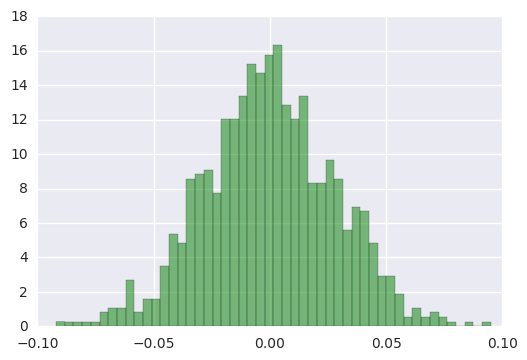

In [10]:
# Are these differences normally distributed?
dy = np.diff(y[:,N])
n,bins,patches = hist(dy,50,normed=1,facecolor='green',alpha=0.5)

In [11]:
from scipy import stats
res = (dy-np.mean(dy))/np.std(dy) 
sres = np.sort(res,axis=None)
print('The Jarque-Bera statistic is %f, with p-value %g' % stats.jarque_bera(sres))
if len(res)<5000: # apparently this test is inaccurate for longer samples
    print('The Shapiro-Wilk statistic is %f, with p-value %g' % stats.shapiro(sres))
print('The Kolmogorov-Smirnov statistic is %f, with p-value %g' % stats.kstest(sres,'norm'))
ad = stats.anderson(res,dist='norm') # for some reason, sometimes ends up dividing by zero
# the Anderson-Darling test provides a list of levels and corresponding significances
i = find(ad[0]>ad[1]); 
if any(i): 
    i = argmax(i)
    print('According to the Anderson-Darling test, normality can be rejected at the %d%% significance level.'%ad[2][i])
else:
    print('According to the Anderson-Darling test, normality cannot be rejected at the %d%% significance level.'%ad[2][0])

The Jarque-Bera statistic is 0.216018, with p-value 0.897619
The Shapiro-Wilk statistic is 0.998849, with p-value 0.7863
The Kolmogorov-Smirnov statistic is 0.021795, with p-value 0.729082
According to the Anderson-Darling test, normality cannot be rejected at the 15% significance level.
